# Thesis Data Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

### Dataset description
-	[dbo].[MV_Project_Summary_Historic]
o	The table provided for you with project data
-	[dbo].[Portfolio_Review_2018_2020]
o	Gave you access, but this dataset has fewer columns but more historical data than the above. I would suggest sticking to the MV_Project_Summary_Historic as that would be most useful for our side, but figures it might be good if maybe you’d want to run additional analyses. Do note that data formats changes significantly after mid-2019. 
-	[dbo].[GR4_Historical_Pipeline]
o	Our historical pipeline, month over month data, do note that data from 2020 would only include “active’ pipeline, while 2021 has more data that is about inactive. 
-	[dbo].[GR4_Historical_Expected_Revenue]
o	Forecasted based on the source system, this is the part of pipeline that is expected to convert to NR. Part of what we’re trying to predict better. 
-	[dbo].[GR_Project_NR_Backlog]
o	Forecasted based on the project duration, this is the part of backlog that is expected to convert to NR. Part of what we’re trying to predict better. 
-	[dbo].[GR_Pipeline]
o	Similar table to the GR4_Historical_Pipleine, but more actively maintained. Only contains active pipeline


In [3]:
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=ARCDBPNJ003.arcadis-us.com\ANARPT01;"
                      "Database=Support_AW;"
                      "Trusted_Connection=yes;")


cursor = conn.cursor()
print(cursor)

In [4]:
cursor.execute('USE Support_AW')
cursor.execute('SELECT * FROM information_schema.tables;')
for row in cursor:
    print('row = %r' % (row,))

row = ('Support_AW', 'dbo', 'GR4_Historical_Pipeline', 'BASE TABLE')
row = ('Support_AW', 'dbo', 'GR4_Historical_Expected_Revenue', 'BASE TABLE')
row = ('Support_AW', 'dbo', 'Portfolio_Review_2018_2020', 'BASE TABLE')
row = ('Support_AW', 'dbo', 'MV_Project_Summary_Historic', 'BASE TABLE')
row = ('Support_AW', 'dbo', 'GR_Project_NR_Backlog', 'BASE TABLE')
row = ('Support_AW', 'dbo', 'GR_Pipeline', 'BASE TABLE')


In [233]:
#cursor.execute("""SELECT 'Project Number',  FROM Portfolio_Review_2018_2020""")

#myresult = mycursor.fetchall()

#for x in myresult:
 # print(x)

In [4]:
portfolio1820 = pd.read_sql_query(
"""SELECT 
[Fiscal Period Code],
[Project Number],
[Project Name],
[Project Id],
[Health and Safety Status],
[project_date_create],
[Project Status],
[SalesCloudClientNo],
[Related Opportunity Project Number],
[Contract Type Name],
[Ultimate Customer AUS Market Sector],
[Division Short Name],
[Funding Amount - ITC (Snapshot)],
[Actual Net Revenue - MTD]
[Backlog NR]
FROM Portfolio_Review_2018_2020; """, con=conn)

#WHERE [Project Status] LIKE '%Closed%'

In [5]:
portfolio = pd.read_sql_query(
"""SELECT *
FROM Portfolio_Review_2018_2020; """, con=conn)

In [6]:
portfolio_all = pd.read_sql_query(
"""SELECT 
[Fiscal Period Code],
[Project Number],
[Project Id],
[Project Name],
[Health and Safety Status],
[project_date_create],
[Project Status],
[SalesCloudClientNo],
[Related Opportunity Project Number],
[Contract Type Name],
[Ultimate Customer AUS Market Sector],
[Division Short Name],
[Funding Amount - ITC (Snapshot)],
[Actual Net Revenue - MTD],
[Backlog NR],
[location_2], 
[location_4],
[primary_client_industry],
[Beyond_client_segment]
FROM Portfolio_Review_2018_2020; """, con=conn)

In [20]:
len(portfolio.columns)

203

In [18]:
portfolio[portfolio.columns[0:10]].head(20)

,Fiscal Period Code,Project Number,Project Agreement Type,Project Id,Project Last Approved Forecast Date,Project Location,Project Manager Employee Number (Current),Project Manager Name (Current),Project Name,Project Status
0,201601,None,None,ADVCLIENT5042,None,None,None,None,UNIVAR - PROJECT MONARCH,A
1,201601,None,None,MPICLIENT000410000080310,None,None,None,None,MP-77B Pine Hill PS - Gen Srvcs,A
2,201601,None,None,mdKCAUGHHORN220630032443,None,None,None,None,YJWWTP Post-Sandy Rehab- PhIII,A
3,201601,None,None,ADVCLIENT22208,None,None,None,None,CIP PM Reporting Dashboard,A
4,201601,None,None,ADVCLIENT20354,None,None,None,None,District Wide Solids Master Plan,A
5,201601,None,None,ADVCLIENT20354,None,None,None,None,MSDGC Flow Monitoring Review,A
6,201601,None,None,MPICLIENT001870000080310,None,None,None,None,Columbia Co Commerce Park WWTP,D
7,201601,None,None,62C8E96AD3014604BDCC6DB9CD928744,None,None,None,None,Col SSCM 2012 Y2,A
8,201601,None,None,maCPAULEY1110919355851,None,None,None,None,Act 537 Plan Assistance,I
9,201601,None,None,MPICLIENT002660000080310,None,None,None,None,Abandoned Chemical Sales Fac.,A


In [13]:
df_num = pd.read_sql_query(
"""SELECT 
[Fiscal Period Code],
[Project Number],
[Project Status],
[SalesCloudClientNo],
[Funding Amount - ITC (Snapshot)],
[Actual Net Revenue - MTD],
[Backlog NR],
[Actual Direct Labor Cost - MTD],
[Actual Direct Labor Cost - YTD],
[Actual Gross Revenue - ITD],
[Actual Gross Revenue - MTD],
[Actual Gross Revenue - YTD],
[Actual Net Revenue - ITD],
[Actual Net Revenue - MTD],
[Actual Net Revenue - YTD],
[EBITA - MTD],
[EBITA - YTD],
[EBITA - ITD],
[Forecast Direct Labor Cost - ITC],
[Forecast Net Revenue - ITC],
[Order Intake (NR) - MTD],
[Order Intake (NR) - QTD],
[Order Intake (NR) - YTD],
[WBS1],
[bookings_jtd],
[interest_current],
[interest_jtd],
[interest_ytd],
[multiplier_budget],
[multiplier_current],
[multiplier_target],
[overhead_current], 
[overhead_rate],
[revenue_type]
FROM Portfolio_Review_2018_2020; """, con=conn)

In [8]:
portfolio_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179046 entries, 0 to 2179045
Data columns (total 19 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Fiscal Period Code                   object 
 1   Project Number                       object 
 2   Project Id                           object 
 3   Project Name                         object 
 4   Health and Safety Status             object 
 5   project_date_create                  object 
 6   Project Status                       object 
 7   SalesCloudClientNo                   object 
 8   Related Opportunity Project Number   object 
 9   Contract Type Name                   object 
 10  Ultimate Customer AUS Market Sector  object 
 11  Division Short Name                  object 
 12  Funding Amount - ITC (Snapshot)      float64
 13  Actual Net Revenue - MTD             float64
 14  Backlog NR                           float64
 15  location_2                      

In [9]:
portfolio_all.head()

,Fiscal Period Code,Project Number,Project Id,Project Name,Health and Safety Status,project_date_create,Project Status,SalesCloudClientNo,Related Opportunity Project Number,Contract Type Name,Ultimate Customer AUS Market Sector,Division Short Name,Funding Amount - ITC (Snapshot),Actual Net Revenue - MTD,Backlog NR,location_2,location_4,primary_client_industry,Beyond_client_segment
0,201601,None,ADVCLIENT5042,UNIVAR - PROJECT MONARCH,None,None,A,10239939,None,T,None,Environment,38000.00,2652.99,8603.62,RE,NT,CP - Chem/Pharma,Chem/Pharma
1,201601,None,MPICLIENT000410000080310,MP-77B Pine Hill PS - Gen Srvcs,None,None,A,10238459,None,L,None,Water,113000.00,0.00,78004.68,NT,PY,MU - Municipal,Public
2,201601,None,mdKCAUGHHORN220630032443,YJWWTP Post-Sandy Rehab- PhIII,None,None,A,10238060,None,C,None,Water,876461.49,1906.53,403665.22,NT,NJ,MU - Municipal,Public
3,201601,None,ADVCLIENT22208,CIP PM Reporting Dashboard,None,None,A,10238090,None,T,None,Water,57700.00,-163.90,20302.00,SO,VA,MU - Municipal,Public
4,201601,None,ADVCLIENT20354,District Wide Solids Master Plan,None,None,A,10238114,None,M,None,Water,137700.00,33651.92,55905.17,NT,ID,MU - Municipal,Public


In [10]:
df_num.head()

,Fiscal Period Code,Project Number,Project Status,SalesCloudClientNo,Funding Amount - ITC (Snapshot),Actual Net Revenue - MTD,Backlog NR,Actual Direct Labor Cost - MTD,Actual Direct Labor Cost - YTD,Actual Gross Revenue - ITD,...,bookings_jtd,interest_current,interest_jtd,interest_ytd,multiplier_budget,multiplier_current,multiplier_target,overhead_current,overhead_rate,revenue_type
0,201601,None,A,10239939,38000.00,2652.99,8603.62,904.10,904.10,26075.99,...,30742.46,-23.04,-18.82,-23.04,3.28,2.93,3.28,1432.73,158.47,I
1,201601,None,A,10238459,113000.00,0.00,78004.68,0.00,0.00,19355.67,...,96000.00,3.19,-49.78,3.19,3.03,0.00,3.08,0.00,172.62,G
2,201601,None,A,10238060,876461.49,1906.53,403665.22,637.20,637.20,380622.33,...,775611.03,1.75,-2243.68,1.75,2.99,2.99,2.99,997.60,156.56,I
3,201601,None,A,10238090,57700.00,-163.90,20302.00,0.00,0.00,36133.00,...,56390.72,13.19,-1764.53,13.19,3.92,0.00,3.22,0.00,183.72,I
4,201601,None,A,10238114,137700.00,33651.92,55905.17,12016.84,12016.84,50605.46,...,106487.05,-79.21,-86.61,-79.21,2.78,2.80,2.78,19404.79,161.48,I


In [14]:
MV_summary = pd.read_sql_query(
""" SELECT 
[Fiscal Period Code],
[Project Number],
[Project Name],
[Project Health Status],
[Project Start Date],
[Project Status],
[POC],
[Sales Cloud Opportunity Number],
[Contract Type Name],
[Contract Status],
[Contract Number],
[Risk Profile],
[Related Opportunity Project Number],
[Related Project Number],
[Legacy Project Number],
[Billing Customer ID],
[BUL1 Num],
[BUL2 Num],
[BUL3 Num],
[Division Num],
[Project Manager Employee Number (Current)],
[Ultimate Customer Market Sector - ANA],
[Division Short Name],
[Funding Amount - ITC (Snapshot)],
[Actual Net Revenue - MTD],
[Project Progress Status (Current)], 
[Scheduled End Date]
FROM MV_Project_Summary_Historic; """, con=conn)

#WHERE [Project Status] LIKE '%Closed%'

In [16]:
len(portfolio), len(MV_summary)  

NameError: name 'portfolio1820' is not defined

In [ ]:
MV_summary.head()

In [ ]:
portfolio1820.head()

In [15]:
# not valid until we know how to map IDs want which project status equates to closed
Backlog_closed = pd.read_sql_query(
"""SELECT *
FROM GR_Project_NR_Backlog
WHERE [Project_Number] IN (
    SELECT [Project Number]
    FROM Portfolio_Review_2018_2020); """, con=conn)

In [15]:
Backlog = pd.read_sql_query(
"""SELECT *
FROM GR_Project_NR_Backlog; """, con=conn)

In [16]:
Pipeline = pd.read_sql_query(
"""SELECT 
[Fiscal_Period_Code],
[Booking_Period],
[Bookings_Date],
[Opportunity_Close_Date_(Date_of_Award)],
[Revenue_Start_Date],
[Opportunity_ID],
[Opportunity_Number],
[Opportunity_Name],
[Project_Name],
[Opportunity_Type],
[Approval_Status],
[Sales_Stage],
[Opportunity_Status],
[Pursuit_Leader],
[Lead_Entity_Revenue_Line],
[Revenue_Status],
[Win_Probability],
[Grid_Probability],
[Gross_Revenue],
[Unweighted_Bookings],
[Weighted_Bookings],
[Service_Line],
[Type_of_Service],
[Strategic_Value],
[Priority_Code],
[Arcadis_Role],
[Win_Loss_Reason_Opportunity],
[Win_Loss_Reason_Revenue_Line],
[Add_more_detail_to_Win_Loss_reason],
[Duration_Months],
[Created_Date],
[Days_in_Stage],
[Pursuit_Committee],
[Target_Gross_Margin],
[Follow_on_Revenue],
[PQQ_Expected],
[PQQ_Submission],
[Interview_Date],
[Confidentiality],
[Tier],
[Comments],
[Primary_Competitor]
FROM GR4_Historical_Pipeline; """, con=conn)

In [12]:
Hist_back = pd.read_sql_query(
"""SELECT *
FROM GR4_Historical_Expected_Revenue; """, con=conn)

In [17]:
Pipeline_hist = pd.read_sql_query(
"""SELECT *
FROM GR_Pipeline; """, con=conn)

In [ ]:
len(Backlog), len(Backlog_closed), len(Hist_back)

In [15]:
### To CSV
portfolio.to_csv('portfolio.csv')
portfolio_all.to_csv('portfolio_selected.csv')
df_num.to_csv('portfolio_numeric.csv')
MV_summary.to_csv('mv_summary.csv')
Backlog.to_csv('backlog.csv')
Hist_back.to_csv('back_hist.csv')
Pipeline.to_csv('pipe_hist.csv')
Pipeline_hist.to_csv('pipe.csv')

## Map Opportunity Number and SalesCloudClientNo -  Which projects are recorded from start till end?


In [301]:
Pipeline.head()

,Fiscal_Period_Code,Booking_Period,Bookings_Date,Opportunity_Close_Date_(Date_of_Award),Revenue_Start_Date,Opportunity_ID,Opportunity_Number,Opportunity_Name,Project_Name,Opportunity_Type,...,Pursuit_Committee,Target_Gross_Margin,Follow_on_Revenue,PQQ_Expected,PQQ_Submission,Interview_Date,Confidentiality,Tier,Comments,Primary_Competitor
0,202103,201805,2018-05-17,2018-05-17,2018-04-09,300000385352182,10123543,Project Diamond,Project Diamond,Project,...,None,0.120,NaN,None,None,None,N,Local,None,__NOT_APPLICABLE__
1,202103,201909,2019-09-16,2019-10-02,2019-09-16,300000994273044,10372840,Former GE Plainville Facility,Former GE Plainville Facility,Project,...,None,0.504,NaN,None,None,None,N,Local,None,__NOT_APPLICABLE__
2,202103,201902,2019-02-19,2019-02-19,None,300000047546127,1053826,Global Environmental Remediation Alliance Prog...,Global Environmental Remediati,Project,...,None,0.100,NaN,None,None,None,N,Local,None,__NOT_APPLICABLE__
3,202103,201706,2017-06-16,2017-06-16,2017-06-30,300000109027599,1067913,GE Non-US Alliance Program India - Alstom Sanand,Remediation of 8 former Alstom,Project,...,None,0.600,NaN,None,None,None,N,Local,None,__NOT_APPLICABLE__
4,202103,201704,2017-04-11,2017-04-11,2017-03-15,300000121749913,1072536,"EDD, 2 sites, India","EDD, 2 sites, India",Project,...,None,0.720,NaN,None,None,None,N,Local,None,__NOT_APPLICABLE__


In [19]:
# TODO get all the columns of the historic in a list
portfolio1820['SalesCloudClientNo'].apply(pd.to_numeric, errors='coerce')
portfolio1820['SalesCloudClientNo'].replace(to_replace=[None], value=0, inplace=True)
portfolio1820['SalesCloudClientNo'] = pd.to_numeric(portfolio1820['SalesCloudClientNo'].str.replace("NULL", "0"), errors='coerce')
portfolio1820.dropna(subset=['SalesCloudClientNo'], inplace=True)
portfolio1820['SalesCloudClientNo']

0          10239939.0
1          10238459.0
2          10238060.0
3          10238090.0
4          10238114.0
              ...    
1679168    10238444.0
1679169    10238672.0
1679170    10240247.0
1679171    10238672.0
1679172    10238672.0
Name: SalesCloudClientNo, Length: 1665139, dtype: float64

In [20]:
portfolio1820['SalesCloudClientNo'].astype(int)

0          10239939
1          10238459
2          10238060
3          10238090
4          10238114
             ...   
1679168    10238444
1679169    10238672
1679170    10240247
1679171    10238672
1679172    10238672
Name: SalesCloudClientNo, Length: 1665139, dtype: int32

In [21]:
list_closed = portfolio_all['SalesCloudClientNo']
len(set(list_closed))

3281

In [22]:
new_ls = list(set(list_closed))

In [23]:
oppo = list(set(Pipeline.Opportunity_Number))
print(list(set(oppo) & set(new_ls)))

[]


In [24]:
#Filter here for the column, to see how many projects were converted and finished in the dataset
Pipeline_closed = Pipeline[Pipeline['Opportunity_Number'].isin(set(list_closed))]
len(Pipeline_closed), len(Pipeline)
length = len(set(Pipeline_closed.Opportunity_Number.to_list()))

f"There are {length} projects which are recorded from pipeline, till closing"

'There are 0 projects which are recorded from pipeline, till closing'

## See how many projects were ever converted from pipeline to project (For classification)

In [345]:
'''
portfolio_all['SalesCloudClientNo'].apply(pd.to_numeric, errors='coerce')
portfolio_all['SalesCloudClientNo'].replace(to_replace=[None], value=0, inplace=True)
portfolio_all['SalesCloudClientNo'] = pd.to_numeric(portfolio_all['SalesCloudClientNo'].str.replace("NULL", "0"), errors='coerce')
portfolio_all.dropna(subset=['SalesCloudClientNo'], inplace=True)
portfolio_all['SalesCloudClientNo']
'''

0          10239939.0
1          10238459.0
2          10238060.0
3          10238090.0
4          10238114.0
              ...    
1679168    10238444.0
1679169    10238672.0
1679170    10240247.0
1679171    10238672.0
1679172    10238672.0
Name: SalesCloudClientNo, Length: 1665139, dtype: float64

In [82]:
portfolio_all['Number']  = portfolio_all['Project Number'].astype("|S")
portfolio_all['Number']  = portfolio_all['Number'].str.decode("utf-8")
portfolio_all['Number']  = portfolio_all['Number'].astype(str)

In [83]:
portfolio_all = portfolio_all[~portfolio_all['Number'].str.contains('[A-Za-z]', na=False)] 

In [84]:
portfolio_all['Number'].apply(pd.to_numeric, errors='coerce')
portfolio_all.dropna(subset=['Number'], inplace=True)

<ipython-input-84-a6fb94221a98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio_all.dropna(subset=['Number'], inplace=True)


In [85]:
number_all = portfolio_all['Number'].astype(float).to_list()                                            

In [315]:
#Pipeline['Opportunity_Number']

0         10123543
1         10372840
2          1053826
3          1067913
4          1072536
            ...   
612855    10456623
612856    10456969
612857    10475655
612858     1099449
612859    10116509
Name: Opportunity_Number, Length: 612860, dtype: int64

In [ ]:
#cloud_closed = portfolio1820['SalesCloudClientNo'].astype(int).to_list()
cloud_all = portfolio_all['SalesCloudClientNo'].astype(int).to_list()
len(set(cloud_closed)), len(set(cloud_all))

In [317]:
#Filter here for the column, to see how many projects were converted and finished in the dataset
'''
Pipeline_closed = Pipeline[Pipeline['Opportunity_Number'].isin(set(cloud_closed))]
len(Pipeline_closed), len(Pipeline)
length = len(set(Pipeline_closed.Opportunity_Number.to_list()))

f"There are {length} projects which are recorded from pipeline, till closing"
'''

'There are 2 projects which are recorded from pipeline, till closing'

In [ ]:
Pipeline_closed = Pipeline[Pipeline['Opportunity_Number'].isin(set(cloud_all))]
len(Pipeline_closed), len(Pipeline)
length = len(set(Pipeline_closed.Opportunity_Number.to_list()))

f"There are {length} projects which were converted from pipeline to project"

## Select Backlog forecasts and actuals in columns for time series forecasting
This has to be done with both the backlog of the projects that were closed and the ones still in progress. The question is what to do with the ones on hold? Include to work with complete dataset or exclude 

In [ ]:
Backlog_closed.columns

In [ ]:
Hist_back.columns

In [67]:
Backlog['Project_Number'].apply(pd.to_numeric, errors='coerce')
Backlog['Project_Number'].replace(to_replace=[None], value=0, inplace=True)
Backlog['Project_Number'] = pd.to_numeric(Backlog['Project_Number'].str.replace("NULL", "0"), errors='coerce')
Backlog.dropna(subset=['Project_Number'], inplace=True)
Backlog['Project_Number']

0          30013323
1          30013323
2          30000430
3          30000430
4          30000430
             ...   
1456310    30063122
1456311    30063122
1456312    30063122
1456313    30063122
1456314    30063122
Name: Project_Number, Length: 1456315, dtype: int64

In [68]:
MV_summary['Project Number'].apply(pd.to_numeric, errors='coerce')
MV_summary['Project Number'].replace(to_replace=[None], value=0, inplace=True)
MV_summary['Project Number'] = pd.to_numeric(MV_summary['Project Number'].str.replace("NULL", "0"), errors='coerce')
MV_summary.dropna(subset=['Project Number'], inplace=True)
MV_summary['Project Number']

0         30000003
1         30000004
2         30000005
3         30000006
4         30000007
            ...   
723228    30087997
723229    30087998
723230    99999997
723231    99999998
723232    99999999
Name: Project Number, Length: 723233, dtype: int64

In [69]:
histback_lst = Hist_back['Opportunity_Number'].to_list()
len(set(histback_lst))

21064

In [70]:
back_lst = Backlog['Project_Number'].to_list()
len(set(back_lst))

26490

In [ ]:
MV_summary.info()

In [71]:
len(portfolio_all['Project Number'].unique())

2430

In [72]:
len(Backlog), len(Backlog_closed), len(Hist_back)  

(1456315, 1451347, 881345)

In [73]:
match = Pipeline[Pipeline['Opportunity_Number'].isin(set(histback_lst))]
length = len(set(match.Opportunity_Number.to_list()))

f"There are {length} projects which can be found in pipeline and were later forecasted in Hist_back"

'There are 21064 projects which can be found in pipeline and were later forecasted in Hist_back'

In [ ]:
#change df_all to portfolio_all
df_all["Project Status"].unique()

In [ ]:
match 

In [74]:
Pipeline['conversion'] = 0

In [ ]:
Pipeline.head()

In [ ]:
# add a label to those successfully converted
# should only one entry be mainatined from the pipeline ? 
for x in Pipeline.index: 
    if Pipeline.loc[x, 'Opportunity_Number'] in set(Hist_back['Opportunity_Number']):
        Pipeline.loc[x, 'conversion'] += 1   

In [86]:
#number_all comes from portfolio project number, and there is only one match. There is no match between Salescloud and backlog
match = Hist_back[Hist_back['Opportunity_Number'].isin(set(number_all))]
length = len(set(match.Opportunity_Number.to_list()))

f"There is {length} project which was forecasted in backlog to project"

'There is 0 project which was forecasted in backlog to project'

In [87]:
match = MV_summary[MV_summary['Project Number'].isin(set(back_lst))]
length = len(set(match['Project Number'].to_list()))

f"There are {length} project which were forcasted in backlog and which are projects"

'There are 26490 project which were forcasted in backlog and which are projects'

In [405]:
#There are 26490 project which were forcasted in backlog and which are projects'

,Fiscal Period Code,Project Number,Project Name,Project Health Status,Project Start Date,Project Status,Sales Cloud Opportunity Number,Contract Type Name,Ultimate Customer Market Sector - ANA,Division Short Name,Funding Amount - ITC (Snapshot),Actual Net Revenue - MTD,Project Progress Status (Current),Scheduled End Date
0,202001,30000003,100017-004-Annual Groundwater Monitoring Repor...,Plan Required,2018-10-01 00:00:00,Open/Active,Unspecified,Time and Material with cap,Consumer Goods & Retail,Environment,63859.06,1275.0,On Track,2021-03-31
1,202001,30000004,100307-000-1682 Victoria Park - ON(3177-1501),Plan Required,2015-03-24 00:00:00,On Hold - Inactive,Unspecified,Time and Material with cap,Commercial Developers,Environment,73420.00,0.0,Unspecified,2020-06-30
2,202001,30000005,100025-005-Rockwell Automation 2019 Routine GW...,Plan Required,2018-10-29 00:00:00,Open/Active,Unspecified,Time and Material with cap,Aerospace,Environment,11790.00,0.0,Unspecified,2020-06-30
3,202001,30000006,100032-002-Novelis-rehabilitation 2018 - Saguenay,Plan Required,2018-06-04 00:00:00,Open/Active,Unspecified,Time and Material with cap,Conglomerates,Environment,733572.81,2900.0,On Track,2021-07-15
6,202001,30000009,100055-005-Prince Albert Regional Landfill - 2018,Plan Required,2018-06-26 00:00:00,Open/Active,Unspecified,Time and Material with cap,Municipalities/Local Govt.,Environment,227627.00,1689.2,On Track,2020-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723149,202104,30087624,Mars Elizabethtown Steam Condensate Piping ACM...,Plan Signed Off,2021-03-01 00:00:00,Open/Active,10461864,Time and Material with cap,Consumer Goods & Retail,Environment,4861.00,0.0,Unspecified,2022-03-01
723153,202104,30087679,Renaud-Bray-Attestation Phase I,Plan Not Required,2021-04-21 00:00:00,Open/Active,10487802,Lump Sum with IFRS,Consumer Goods & Retail,Environment,2000.00,0.0,Unspecified,2021-06-30
723154,202104,30087686,NYSEG Plattsburgh – Packer Testing,Plan Required,2021-04-01 00:00:00,Open/Active,503498,Time and Material with cap,Power Companies/Utilities,Environment,8300.00,0.0,Unspecified,2021-12-31
723166,202104,99999997,Water NT CI,None,None,On Hold - Inactive,Unspecified,None,None,Water,0.00,0.0,None,None


In [329]:
#ls = [type(item) for item in number_closed]
#print(set(ls))
#Backlog_match = Hist_back[Hist_back['Opportunity_Number'].isin(cloud_all)]
#Backlog_match

In [ ]:
backlogprojects = list(set(Hist_back['Opportunity_Number']))

In [331]:
#Groupby project number
portfolio_all.head()

,Fiscal Period Code,Project Number,Project Id,Project Name,Health and Safety Status,project_date_create,Project Status,SalesCloudClientNo,Related Opportunity Project Number,Contract Type Name,Ultimate Customer AUS Market Sector,Division Short Name,Funding Amount - ITC (Snapshot),Actual Net Revenue - MTD,Backlog NR,location_2,location_4,primary_client_industry,Beyond_client_segment,Number
1307321,201901,021182140001,KCAUGHHORN187179179452,Frankford Arsenal Area II Remediation,None,None,A,10238426.0,None,Lump Sum,None,Environment,74538.25,106.74,663.02,RE,EA,FED - Federal,Federal,021182140001
1307322,201901,002288070000,62C8E96AD3014604BDCC6DB9CD928744,COL Cogen- JPWWTP PreDesign,None,None,I,10238139.0,None,Time and Material with cap,None,Water,1025883.00,-13524.16,13209.91,NT,OO,MU - Municipal,Public,002288070000
1307323,201901,002288070001,62C8E96AD3014604BDCC6DB9CD928744,Col CoGen JPWWTP Detailed Design,None,None,A,10238139.0,None,Time and Material with cap,None,Water,2309950.00,14499.72,1210738.28,NT,OO,MU - Municipal,Public,002288070001
1307324,201901,002341830003,mdKCAUGHHORN220630032308,Wilson Blvd. Trunk Sewer Eval,None,None,A,10238163.0,None,Cost plus Fixed Fee,None,Water,0.00,0.00,0.00,NT,NJ,MU - Municipal,Public,002341830003
1307325,201901,002341830004,mdKCAUGHHORN220630032308,FEV WRRF Biosolids Handling Approach,None,None,A,10238163.0,None,Cost plus Fixed Fee,None,Water,30165.96,6618.91,20547.05,NT,NJ,MU - Municipal,Public,002341830004


In [332]:
df_num.head()

,Fiscal Period Code,Project Number,Project Status,SalesCloudClientNo,Funding Amount - ITC (Snapshot),Actual Net Revenue - MTD,Backlog NR,Actual Direct Labor Cost - MTD,Actual Direct Labor Cost - YTD,Actual Gross Revenue - ITD,...,bookings_jtd,interest_current,interest_jtd,interest_ytd,multiplier_budget,multiplier_current,multiplier_target,overhead_current,overhead_rate,revenue_type
0,201601,None,A,10239939,38000.00,2652.99,8603.62,904.10,904.10,26075.99,...,30742.46,-23.04,-18.82,-23.04,3.28,2.93,3.28,1432.73,158.47,I
1,201601,None,A,10238459,113000.00,0.00,78004.68,0.00,0.00,19355.67,...,96000.00,3.19,-49.78,3.19,3.03,0.00,3.08,0.00,172.62,G
2,201601,None,A,10238060,876461.49,1906.53,403665.22,637.20,637.20,380622.33,...,775611.03,1.75,-2243.68,1.75,2.99,2.99,2.99,997.60,156.56,I
3,201601,None,A,10238090,57700.00,-163.90,20302.00,0.00,0.00,36133.00,...,56390.72,13.19,-1764.53,13.19,3.92,0.00,3.22,0.00,183.72,I
4,201601,None,A,10238114,137700.00,33651.92,55905.17,12016.84,12016.84,50605.46,...,106487.05,-79.21,-86.61,-79.21,2.78,2.80,2.78,19404.79,161.48,I


In [93]:
Backlog.head()

,Fiscal_Period_Code,Project_Number,Fiscal_Period_Code_Backlog,Backlog_NR,Forecast_Multiplier,ETC_Multiplier,RunDate,ETC_Labor,Forecast_Labor,Backlog_Status,PeriodPrjNum
0,202010,30000430,202011,269.64,2.521538,2.869522,2020-12-17 11:41:00,93.97,106.94,Phased Backlog,20201030000430
1,202010,30000430,202012,269.64,2.521538,2.869522,2020-12-17 11:41:00,93.97,106.94,Phased Backlog,20201030000430
2,202010,30000430,202101,269.64,2.521538,2.869522,2020-12-17 11:41:00,93.97,106.94,Phased Backlog,20201030000430
3,202010,30000430,202102,269.64,2.521538,2.869522,2020-12-17 11:41:00,93.97,106.94,Phased Backlog,20201030000430
4,202010,30000430,202103,269.64,2.521538,2.869522,2020-12-17 11:41:00,93.97,106.94,Phased Backlog,20201030000430


In [354]:
Hist_back.head()

,Fiscal_Period_Code,Revenue_Period,Rev_Line_ID,Opportunity_Number,Lead_Entity_Opportunity,Lead_Entity_Revenue_Line,Currency_Rev_Line,Weighted_Revenue,Unweighted_Revenue,Unweighted_Rev_Ldgr_OwnOrg,Weighted_Rev_Ldgr_OwnOrg,Unweighted_Rev_Ldgr_PerfOrg,Weighted_Rev_Ldgr_PerfOrg,OpUnit,PerfUnit,Currency_OpUnit,Currency_PerfUnit,Update_Date
0,202101,None,300000200995961,1092327,AEU Belgium,AEU Belgium,EUR,570.18,1118.0,1118.0,570.18,1118.0,570.18,AEU Belgium,AEU Belgium,EUR,EUR,2021-02-26
1,202101,None,300000397152168,10130291,AEU Belgium,AEU Belgium,EUR,5000.00,50000.0,50000.0,5000.00,50000.0,5000.00,AEU Belgium,AEU Belgium,EUR,EUR,2021-02-26
2,202101,None,300001829141660,10402627,AUK Infrastructure - Rail,AUK Infrastructure - Rail,GBP,88176.90,88176.9,88176.9,88176.90,88176.9,88176.90,AUK Infrastructure,AUK Infrastructure,GBP,GBP,2021-02-26
3,202101,None,300001844087207,10402148,AEU Belgium,AEU Belgium,EUR,242316.90,807723.0,807723.0,242316.90,807723.0,242316.90,AEU Belgium,AEU Belgium,EUR,EUR,2021-02-26
4,202101,None,300002044580287,10408193,AAP EAA - Environment & Waste,AAP EAA - Environment & Waste,AUD,23850.00,79500.0,79500.0,23850.00,79500.0,23850.00,AAP EAA,AAP EAA,AUD,AUD,2021-02-26


## Map project Numbers and compare Backlog to 

In [15]:
#df_sub_b.columns.values

array(['Project_Number', 'Backlog_Status', 'Backlog_NR',
       'Fiscal_Period_Code_Backlog'], dtype=object)

In [16]:
#df_sub_b.rename(columns={'Project_Number': 'Project Number'}, inplace =True)

In [ ]:
'''
back_list =df_sub_b['Project Number'].tolist()
len(pipe_list)
historic_list = df_sub_h['Project Number'].tolist()
len(historic_list)
# Many similar porject numbers of Project ID and Opportunity ID
len(list(set(historic_list) & set(back_list)))
'''

## Understand possible predictor variables (Groupby), visualize

In [28]:
portfolio_all.head()

,Fiscal Period Code,Project Number,Project Id,Project Name,Health and Safety Status,project_date_create,Project Status,SalesCloudClientNo,Related Opportunity Project Number,Contract Type Name,Ultimate Customer AUS Market Sector,Division Short Name,Funding Amount - ITC (Snapshot),Actual Net Revenue - MTD,Backlog NR,location_2,location_4,primary_client_industry,Beyond_client_segment
0,201601,None,ADVCLIENT5042,UNIVAR - PROJECT MONARCH,None,None,A,10239939,None,T,None,Environment,38000.00,2652.99,8603.62,RE,NT,CP - Chem/Pharma,Chem/Pharma
1,201601,None,MPICLIENT000410000080310,MP-77B Pine Hill PS - Gen Srvcs,None,None,A,10238459,None,L,None,Water,113000.00,0.00,78004.68,NT,PY,MU - Municipal,Public
2,201601,None,mdKCAUGHHORN220630032443,YJWWTP Post-Sandy Rehab- PhIII,None,None,A,10238060,None,C,None,Water,876461.49,1906.53,403665.22,NT,NJ,MU - Municipal,Public
3,201601,None,ADVCLIENT22208,CIP PM Reporting Dashboard,None,None,A,10238090,None,T,None,Water,57700.00,-163.90,20302.00,SO,VA,MU - Municipal,Public
4,201601,None,ADVCLIENT20354,District Wide Solids Master Plan,None,None,A,10238114,None,M,None,Water,137700.00,33651.92,55905.17,NT,ID,MU - Municipal,Public


In [347]:
df_num.columns

Index(['Fiscal Period Code', 'Project Number', 'Project Status',
       'SalesCloudClientNo', 'Funding Amount - ITC (Snapshot)',
       'Actual Net Revenue - MTD', 'Backlog NR',
       'Actual Direct Labor Cost - MTD', 'Actual Direct Labor Cost - YTD',
       'Actual Gross Revenue - ITD', 'Actual Gross Revenue - MTD',
       'Actual Gross Revenue - YTD', 'Actual Net Revenue - ITD',
       'Actual Net Revenue - MTD', 'Actual Net Revenue - YTD', 'EBITA - MTD',
       'EBITA - YTD', 'EBITA - ITD', 'Forecast Direct Labor Cost - ITC',
       'Forecast Net Revenue - ITC', 'Order Intake (NR) - MTD',
       'Order Intake (NR) - QTD', 'Order Intake (NR) - YTD', 'WBS1',
       'bookings_jtd', 'interest_current', 'interest_jtd', 'interest_ytd',
       'multiplier_budget', 'multiplier_current', 'multiplier_target',
       'overhead_current', 'overhead_rate', 'revenue_type'],
      dtype='object')

In [29]:
len(set(df_num['SalesCloudClientNo'].to_list())) #or salescloudnumber 

3281

In [30]:
len(set(df_num['Project Number'].to_list()))

85462

### Here we start subsetting into a df where projects only appear once. The entire dataframe is stored in df_all

In [39]:
df_all = portfolio_all.copy()
len(df_all)

2179046

In [40]:
portfolio_all.drop_duplicates(subset ="SalesCloudClientNo", keep = 'last', inplace = True)

<AxesSubplot:xlabel='Beyond_client_segment'>

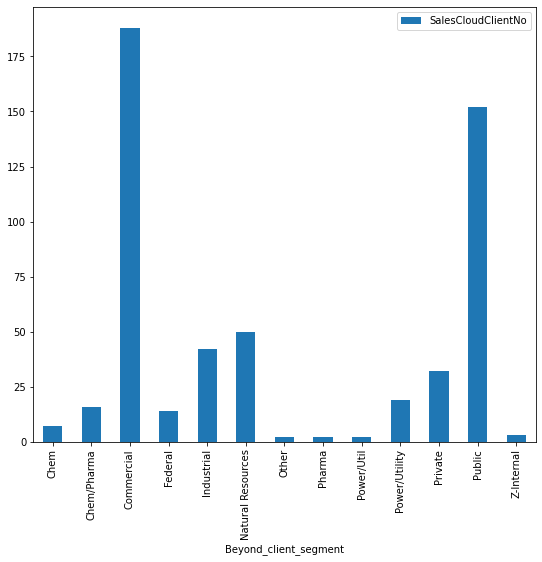

In [41]:
f"Client Segments (longer projects overrepresented), and should SalescloudClientNo or Project Number be used?"

seg = portfolio_all.groupby('Beyond_client_segment').count()
# plot the dataframe 
seg.plot(y=["SalesCloudClientNo"], kind="bar", figsize=(9, 8))  

In [42]:
def analysis(column):
    print(portfolio_all[column].unique())
    sub =portfolio_all.groupby(column).count()
    # plot the dataframe 
    return sub.plot(y=["SalesCloudClientNo"], kind="bar", figsize=(9, 8)) 

In [34]:
portfolio_all.columns.values

array(['Fiscal Period Code', 'Project Number', 'Project Id',
       'Project Name', 'Health and Safety Status', 'project_date_create',
       'Project Status', 'SalesCloudClientNo',
       'Related Opportunity Project Number', 'Contract Type Name',
       'Ultimate Customer AUS Market Sector', 'Division Short Name',
       'Funding Amount - ITC (Snapshot)', 'Actual Net Revenue - MTD',
       'Backlog NR', 'location_2', 'location_4',
       'primary_client_industry', 'Beyond_client_segment'], dtype=object)

[None 'Conglomerates' 'Commercial Developers' 'Oil & Gas'
 'Consumer Goods & Retail' 'Municipalities/Local Govt.'
 'Fin. Institutions/Investors' 'Power Companies/Utilities'
 'Ports/Transportation' 'Institutional Agencies'
 'Central/Federal Government' 'Mining & Metals'
 'Water Companies/Utilities' 'State/Regional Government' 'Technology'
 'Other Private' 'Education' 'Automotive' 'Intercompany' 'Chemicals'
 'Unspecified' 'Life Sciences' 'Healthcare' 'Rail' 'Aerospace' 'Non-Rail']


<AxesSubplot:xlabel='Ultimate Customer AUS Market Sector'>

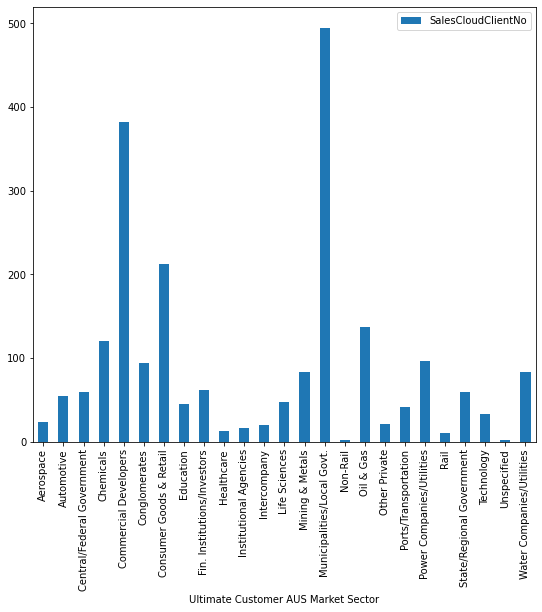

In [43]:
analysis('Ultimate Customer AUS Market Sector')

[None 'Plan Not Required' 'Plan Required' 'Unspecified' 'Plan Signed Off']


<AxesSubplot:xlabel='Health and Safety Status'>

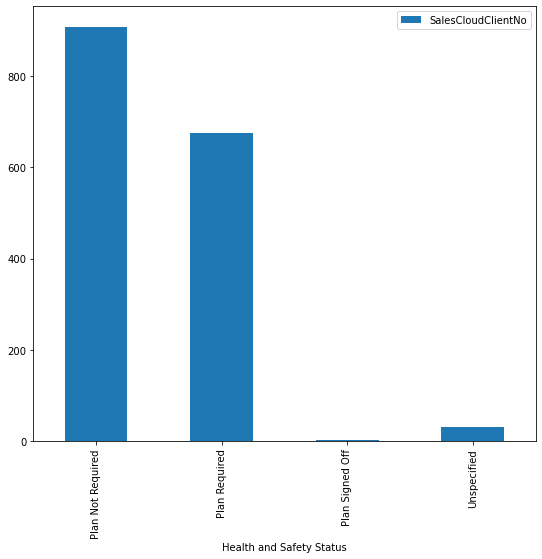

In [45]:
analysis("Health and Safety Status")

['Environment' 'Water' 'Infrastructure' 'Buildings' 'Enabling Function']


<AxesSubplot:xlabel='Division Short Name'>

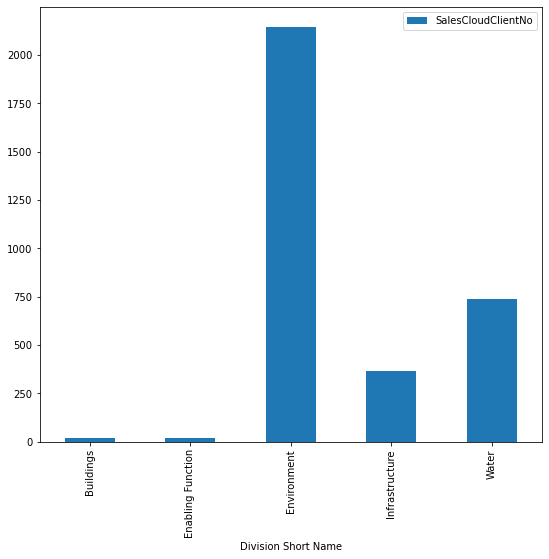

In [46]:
analysis("Division Short Name")

['T' 'L' 'M' 'C' 'N' 'R' 'Time and Material with cap' 'Lump Sum'
 'Time and Material' 'Cost plus Fixed Fee' 'H' None 'Lump Sum with IFRS'
 '0' 'Unspecified' 'Revenue group']


<AxesSubplot:xlabel='Contract Type Name'>

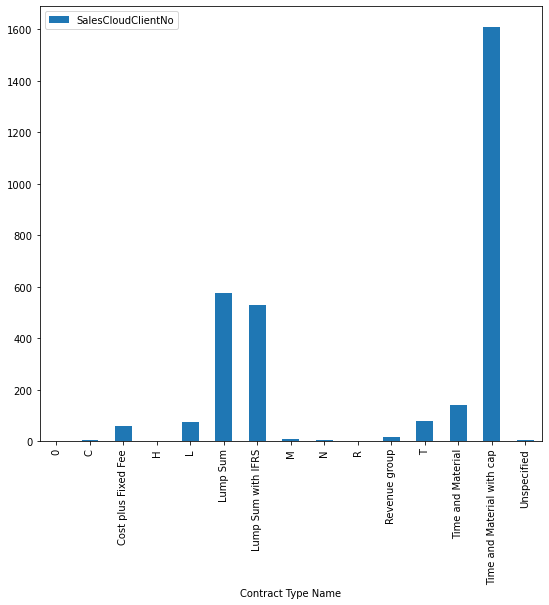

In [48]:
analysis("Contract Type Name")

In [57]:
portfolio_all["Funding"] = portfolio_all["Funding Amount - ITC (Snapshot)"].round()

In [64]:
closed_proj = df_num[df_num["Project Status"] == 'Closed']["Project Number"]
closed_proj.unique()

array(['CA000770.0027', 'HT129002.0005', 'BB025514.0000', ..., '30016285',
       '30016289', '30016331'], dtype=object)

In [66]:
df_num[df_num['Project Number'] == "30016285"]

,Fiscal Period Code,Project Number,Project Status,SalesCloudClientNo,Funding Amount - ITC (Snapshot),Actual Net Revenue - MTD,Backlog NR,Actual Direct Labor Cost - MTD,Actual Direct Labor Cost - YTD,Actual Gross Revenue - ITD,...,bookings_jtd,interest_current,interest_jtd,interest_ytd,multiplier_budget,multiplier_current,multiplier_target,overhead_current,overhead_rate,revenue_type
1547346,201907,30016285,Open/Active,10239935,NaN,345.99,NaN,177.6240,5944.26,44949.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1564281,201908,30016285,Open/Active,10239935,NaN,691.08,NaN,185.1960,6129.46,45675.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1596752,201909,30016285,Open/Active,10239935,NaN,1674.46,NaN,563.8590,6693.32,47426.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1605168,201910,30016285,Open/Active,10239935,NaN,1242.43,NaN,439.5840,7132.90,49900.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1629679,201911,30016285,Open/Active,10239935,NaN,4088.50,NaN,1557.1785,8690.08,53988.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1671637,201912,30016285,Open/Active,10239935,NaN,1062.78,NaN,389.6930,9079.77,55139.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1693126,202001,30016285,Open/Active,None,66449.0,649.74,8353.39,247.9000,247.90,56244.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1710919,202002,30016285,Open/Active,None,66449.0,1492.98,6860.41,545.9400,793.83,57741.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1767236,202003,30016285,Open/Active,None,66449.0,629.69,6230.72,185.4900,979.33,58371.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1782094,202004,30016285,Open/Active,None,66449.0,3170.74,2116.57,1247.8400,2227.17,61542.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


## Forecast Baseline

In [23]:
df_sub_b.to_csv('sub_b.csv')

In [24]:
len(df_sub_h),len(df_sub_b)

(37548, 89958)

In [25]:
# Get the counts for how long project was forecasted
df4 = df_sub_b.groupby('Project Number').count()
df6 = df4.reset_index()
df6.columns.values
df5 = df6[['Project Number', 'Backlog_Status']].copy()


In [26]:
df_sub_b.drop_duplicates(subset=['Project Number'], keep='first', inplace =True)
len(df_sub_b)

10448

In [27]:
df7 = df_sub_b.merge(df5, on='Project Number')
#df7.drop(columns=['number of months'], axis=1, inplace=True)
df7.rename(columns={'Backlog_Status_y': 'No_months', 'Backlog_Status_x': 'Backlog_Status'}, inplace=True)
df7.head()

,Project Number,Backlog_Status,Backlog_NR,Fiscal_Period_Code_Backlog,No_months
0,30040277,Phased Backlog,198.17,202002,11
1,30040280,Phased Backlog,778.87,202002,6
2,30040177,Phased Backlog,220.13,202006,22
3,30040181,Phased Backlog,1150.63,202002,10
4,30040183,Phased Backlog,971.34,202002,9


In [28]:
#df2 = df_sub_b.groupby('Project Number')
#df3 =df2.first()
#df3.reset_index()

In [29]:
df7['Sum'] = df7['No_months'] * df7['Backlog_NR'] 


In [30]:
df7.head()

,Project Number,Backlog_Status,Backlog_NR,Fiscal_Period_Code_Backlog,No_months,Sum
0,30040277,Phased Backlog,198.17,202002,11,2179.87
1,30040280,Phased Backlog,778.87,202002,6,4673.22
2,30040177,Phased Backlog,220.13,202006,22,4842.86
3,30040181,Phased Backlog,1150.63,202002,10,11506.30
4,30040183,Phased Backlog,971.34,202002,9,8742.06


In [31]:
df9 =df_sub_h.drop_duplicates(subset=['Project Number'], keep='first')

In [32]:
len(df9), len(df7)
a = df9['Project Number'].tolist()
b = df7['Project Number'].tolist()
len(list(set(a) & set(b)))

df8 = df9.merge(df7, on='Project Number')
len(df8)

10448

In [33]:
df8['POC'] = df8['POC'].round()

In [34]:
df8.to_csv('back_hist.csv')

# Compare forecast to baseline

In [35]:
#https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

<AxesSubplot:>

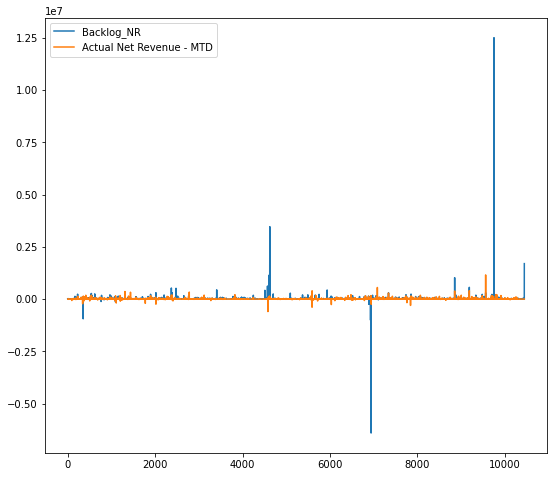

In [36]:
# Different Project Types
# plot the dataframe 
df8.plot(y=["Backlog_NR", "Actual Net Revenue - MTD"], kind="line", figsize=(9, 8))  

## Forecast Error (or Residual Forecast Error)

In [37]:
df8["Error"] = df8['Actual Net Revenue - MTD'] - df8['Backlog_NR']

In [38]:
df8[df8['Backlog_NR'] == df8['Backlog_NR'].max()]

,Project Number,Project Id,Project Agreement Type,Project Status,Project Start Date,Scheduled End Date,Country Name,Division Short Name,Review Regime,Risk Profile,...,Funding Amount - ITC (Snapshot),Ultimate Customer Market Sector - ANA,Project Progress Status (Current),Actual Net Revenue - YTD,Backlog_Status,Backlog_NR,Fiscal_Period_Code_Backlog,No_months,Sum,Error
9753,30041592,3.000015e+14,Lump Sum with IFRS,Open/Active,2019-10-01 00:00:00,2019-12-31,United States,Environment,Project Handover,Medium,...,12500000.0,Oil & Gas,Unspecified,0.0,Expired,12500000.0,202001,1,12500000.0,-12500000.0


In [39]:
# Get indexes where name column has value john and 
# insert here 
# df8[(df8['Backlog_Status'] == 'Expired')].index
# indexNames = df8[(df8['Project Status'] == 'Closed')].index
# indexNames = df8[(df8['POC'] == 100.00)].index
#indexNames = df8[(df8['Project Status'] == 'On Hold - Inactive')].index

'''Optional'''

# df8[df8['Backlog_NR'] == df8['Backlog_NR'].max()]
# df8[df8['Actual Net Revenue - MTD'] == df8['Actual Net Revenue - MTD'].max()]
# df8[df8['Actual Net Revenue - MTD'] == df8['Actual Net Revenue - MTD'].min()]

indexNames = df8[df8['Actual Net Revenue - MTD'] == df8['Actual Net Revenue - MTD'].min()].index
# Delete these row indexes from dataFrame
df8.drop(indexNames , inplace=True)



In [40]:
len(df8)

10447

In [41]:
expected = df8['Actual Net Revenue - MTD'].tolist()
predictions =  df8['Backlog_NR'].tolist()
forecast_errors = [expected[i] - predictions[i] for i in range(len(expected))]
#max(forecast_errors)
#print('Forecast Errors: %s' % forecast_errors)

## Mean Forecast Error (or Forecast Bias)

In [104]:
bias = sum(forecast_errors) * 1.0/len(expected)
print('Bias: %f' % bias) 
# Large negative meaning overforecasted, generally too high. We overforecast by 1273

Bias: -666.062759


## Mean Absolute Error

In [105]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)

MAE: 6906.858014


## Mean Squared error

In [106]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)

MSE: 508822441.456460


## run some kind of regression on Actual net revenue